<a href="https://colab.research.google.com/github/Sigizmund/LinearRegressionPyTorch/blob/main/PyTorchLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#let's start from the beginning
#data
X = torch.arange(0.02, 1.32, 0.02)

weight = 1.4
bias = 0.6

y = X*weight + bias

split = int(len(X)*0.8)
print(split)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

52


In [ ]:
#visualize data
def plot_predictions(test_data = X_test, test_labels = y_test, train_data = X_train, train_labels = y_train, predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(test_data, test_labels, c = 'b', s = 50, label = "Test data")
  plt.scatter(train_data, train_labels, c = 'g', s = 50, label = "Train data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s = 50, label = "predictions")
  plt.legend(prop={'size':14})

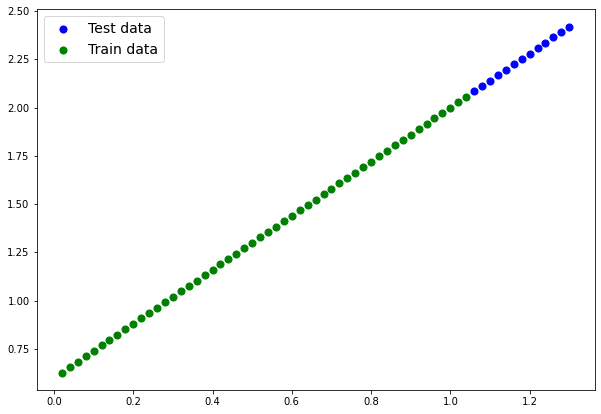

In [ ]:
plot_predictions()

In [ ]:
#model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [ ]:
model = LinearRegressionModel()

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([-0.6890])), ('bias', tensor([-1.1267]))])

In [ ]:
with torch.inference_mode():
  y_p = model(X_test)

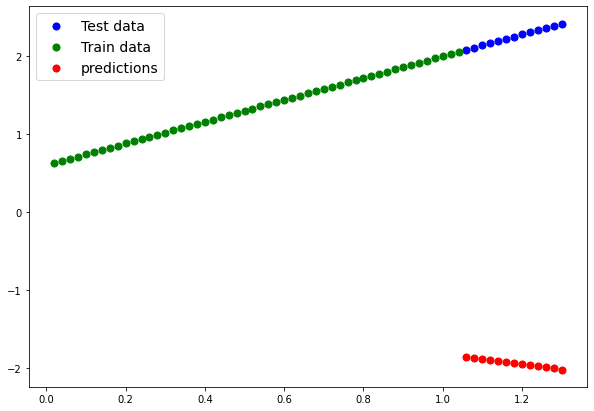

In [ ]:
plot_predictions(predictions = y_p)

In [ ]:
# prepping up training
lossfn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.001)

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([-0.6890])), ('bias', tensor([-1.1267]))])

In [ ]:
#Train 
epochs = 10000
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  model.train()

  y_preds = model(X_train)
  loss = lossfn(y_preds, y_train)
  optimizer.zero_grad() 
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    model.eval()
    with torch.inference_mode():
      y_pr_t = model(X_test)
      loss_test= lossfn(y_pr_t, y_test)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(loss_test)


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([1.3999])), ('bias', tensor([0.6008]))])

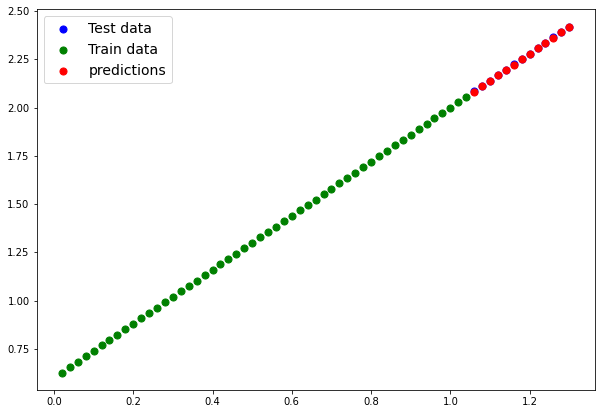

In [ ]:
plot_predictions(predictions = y_pr_t)

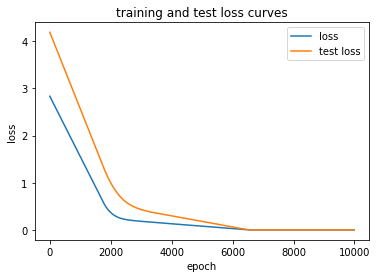

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = 'loss')
plt.plot(epoch_count, test_loss_values, label = 'test loss')
plt.title('training and test loss curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()